In [1]:
import pandas as pd
import numpy as np

In [2]:
## basic visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [3]:
## for advanced visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

In [4]:
# for providing the path
import os
print(os.listdir('../input/'))

['alexa_reviews.tsv']


In [5]:
## read data
data = pd.read_csv('../input/alexa_reviews.tsv', delimiter='\t', quoting=3)

In [6]:
data.shape

(3150, 5)

In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
## check for null data
data.isnull().any().any()   

False

In [9]:
## add length columns for the length of the reviews
data['length'] = data['verified_reviews'].apply(len)

In [10]:
## describe data according to rating
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [11]:
## describe data according to feedback
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

## visualization

In [12]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data=df, layout=layout)
py.iplot(fig)

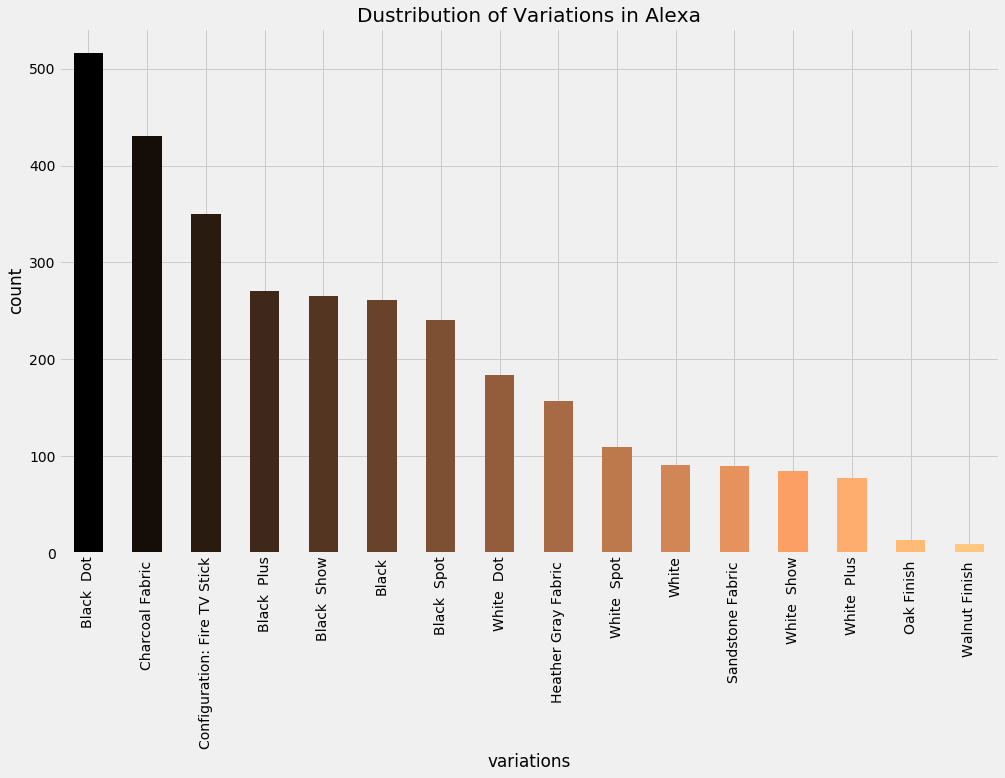

In [13]:
## variations distribution
color = plt.cm.copper(np.linspace(0,1,16))
data['variation'].value_counts().plot.bar(color=color, figsize=(15,9))
plt.title('Dustribution of Variations in Alexa', fontsize=20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [14]:
#distrubtion of feedbacks
feedbacks = data['feedback'].value_counts()

label_feedback = feedbacks.index
size_feedback = feedbacks.values

colors = ['yellow', 'lightgreen']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [feedback_piechart]

layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')

fig = go.Figure(data=df, layout=layout)
py.iplot(fig)

Text(0, 0.5, 'Count')

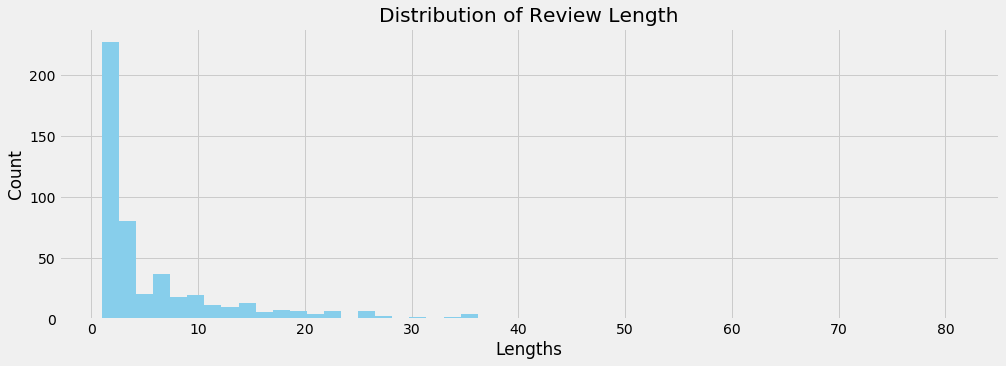

In [15]:
data['length'].value_counts().plot.hist(color='skyblue', figsize=(15,5), bins=50)
plt.title('Distribution of Review Length')
plt.xlabel('Lengths')
plt.ylabel('Count')

#### some example of reviews 

In [16]:
data[data['length'] == 1]['verified_reviews'].iloc[0]


'😍'

In [17]:
data[data['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [18]:
data[data['length'] == 50]['verified_reviews'].iloc[0]


'Yet another Exho for our home and love them all!!!'

In [19]:
data[data['length'] == 150]['verified_reviews'].iloc[0]


'"Love my Echo. Still learning all the things it will do. Wasn’t able to follow instructions included in the package, but found a great one on U-Tube."'

In [20]:
## variations vs reatings (bivariate plot)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

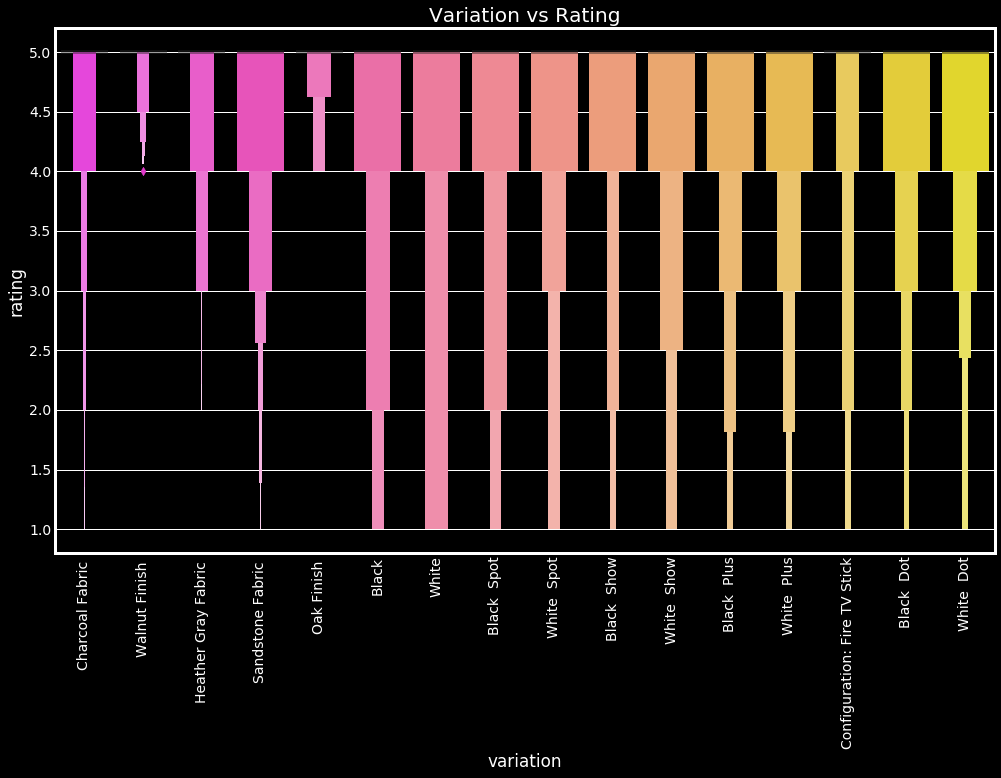

In [21]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('dark_background')
sns.boxenplot(data['variation'], data['rating'], palette='spring')
plt.title('Variation vs Rating')
plt.xticks(rotation=90)


In [22]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Text(0.5, 1.0, 'feedback wise Mean Ratings')

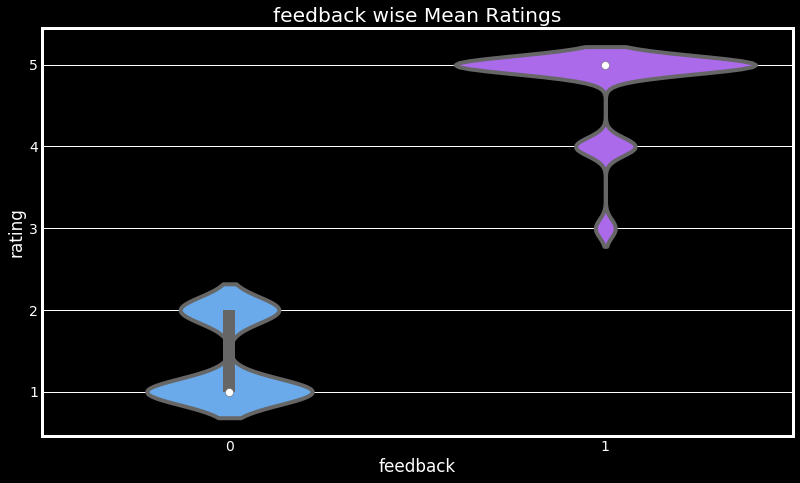

In [23]:
## rating vs feedback
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('dark_background')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("feedback wise Mean Ratings")

The plot above shows that  the products with zero reviews, had also lower ratings

Text(0.5, 1.0, 'Length vs Ratings')

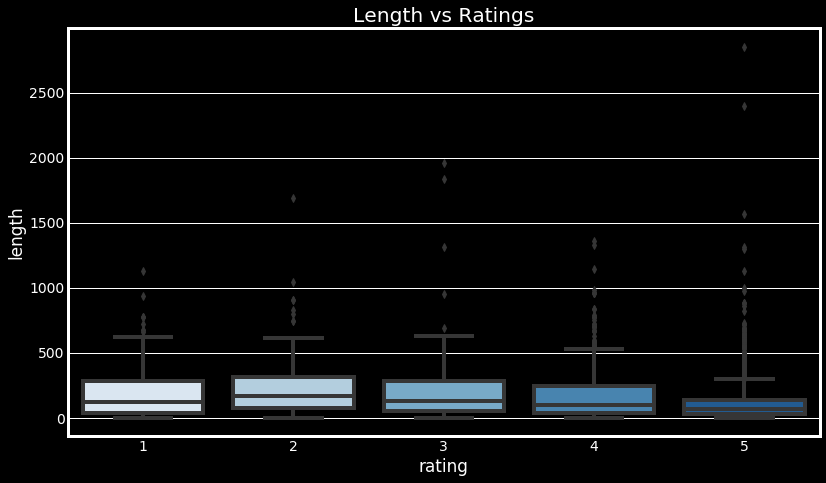

In [24]:
## rates vs length
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('dark_background')

sns.boxplot(data['rating'], data['length'], palette = 'Blues')
plt.title("Length vs Ratings")

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)
word_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key= lambda x: x[1], reverse=True)
frequency = pd.DataFrame(word_freq, columns=['word','freq'])

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

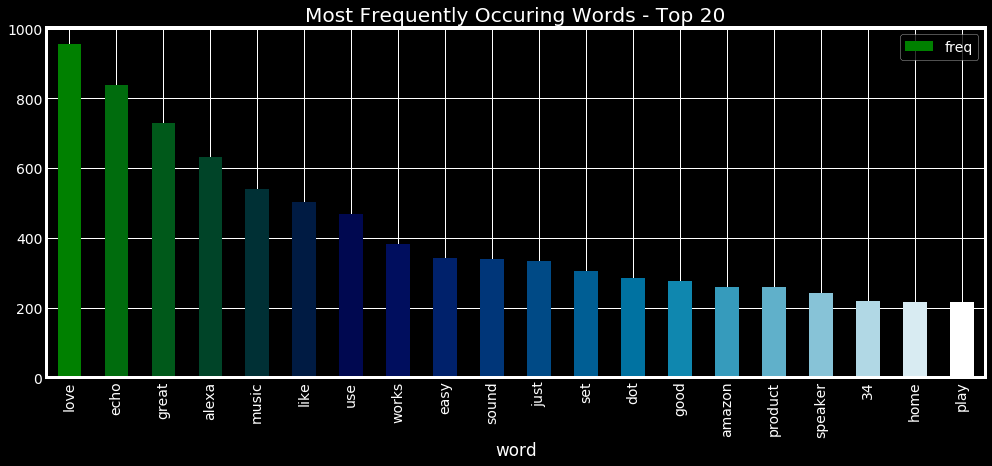

In [27]:
plt.style.use('dark_background')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
# plt.xticks(fontsize=0.01)

In [28]:
words.sum(axis=0)

matrix([[4, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [29]:
cv.vocabulary_.items()

dict_items([('love', 2029), ('echo', 1095), ('loved', 2030), ('playing', 2471), ('game', 1413), ('answer', 236), ('question', 2623), ('correctly', 796), ('alexa', 190), ('says', 2885), ('got', 1473), ('wrong', 3752), ('answers', 239), ('like', 1955), ('able', 79), ('turn', 3497), ('lights', 1954), ('away', 337), ('home', 1616), ('lot', 2023), ('fun', 1395), ('thing', 3386), ('yr', 3775), ('old', 2289), ('learns', 1927), ('dinosaurs', 980), ('control', 770), ('play', 2468), ('games', 1414), ('categories', 564), ('nice', 2230), ('sound', 3115), ('music', 2183), ('received', 2681), ('gift', 1444), ('needed', 2210), ('bluetooth', 436), ('easily', 1091), ('accessible', 89), ('smart', 3061), ('speaker', 3136), ('wait', 3643), ('having', 1558), ('cellphone', 575), ('use', 3576), ('features', 1300), ('ipad', 1804), ('great', 1495), ('alarm', 183), ('deaf', 881), ('hear', 1571), ('bedroom', 385), ('living', 1983), ('room', 2842), ('reason', 2670), ('ask', 288), ('random', 2642), ('questions', 2

In [30]:
cv.stop_words_

set()

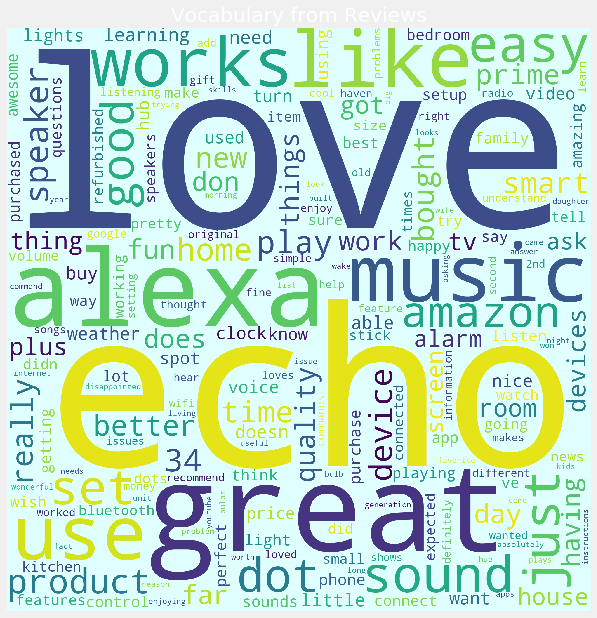

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(word_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

In [32]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)